# Bike Sharing System

In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings('ignore')

In [2]:
# Import the data
bike_sharing_data=pd.read_csv('day.csv')
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bike_sharing_data.shape

(730, 16)

In [5]:
bike_sharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Dropping instant field as its an ID with unique record for all columns and wont be of much significance in the prediction
# Dropping dteday as its unique value for every record. Hence wont add much significance to our model
# Dropping casual and registered as it doesnt add much significance to our analysis.
bike_sharing_data=bike_sharing_data.drop(['instant','dteday','casual','registered'], axis=1)
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Analysis

<Axes: xlabel='weekday'>

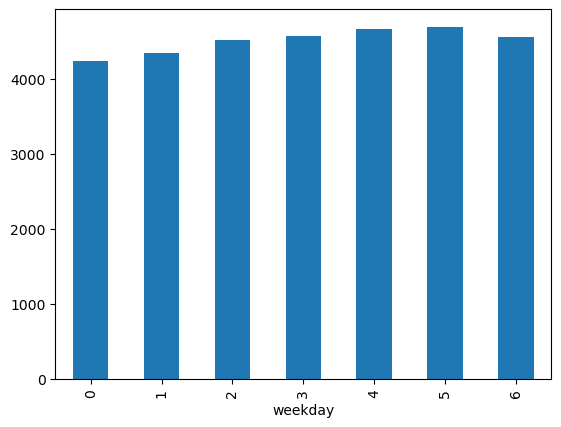

In [7]:
##Plot a bar plot of weekday vs cnt 
bike_sharing_data.groupby(by='weekday')['cnt'].mean().plot.bar()



<Axes: xlabel='season'>

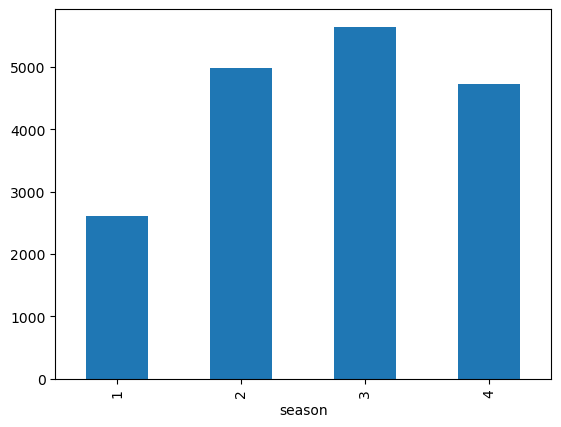

In [8]:
##Plot a bar plot of season vs cnt 
bike_sharing_data.groupby(by='season')['cnt'].mean().plot.bar()



<Axes: xlabel='mnth'>

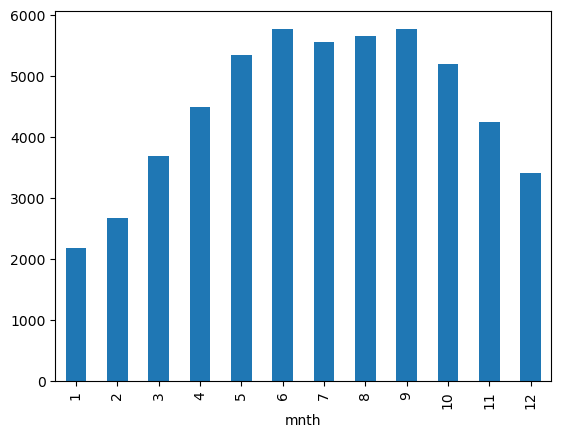

In [9]:
##Plot a bar plot of mnth vs cnt 
bike_sharing_data.groupby(by='mnth')['cnt'].mean().plot.bar()



<Axes: xlabel='weathersit'>

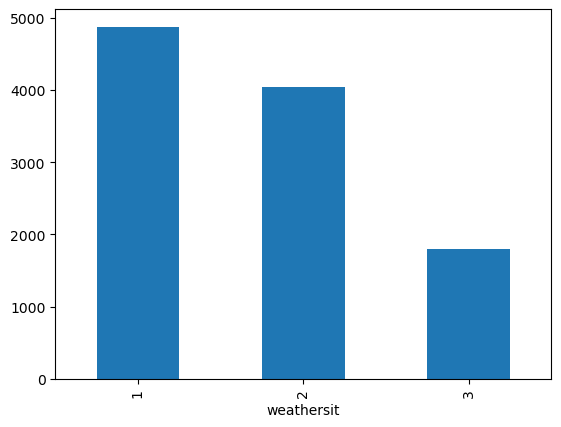

In [10]:
##Plot a bar plot of weathersit vs cnt 
bike_sharing_data.groupby(by='weathersit')['cnt'].mean().plot.bar()



In [11]:
# Visualising the numerical variables.
sns.pairplot(bike_sharing_data)
plt.plot()

[]

### Creating Dummy variables

In [12]:
# Converting the column type to string in order to map category value
bike_sharing_data['weathersit']=bike_sharing_data['weathersit'].astype('string')
bike_sharing_data.head()

In [13]:
# mapping number category to string value.
bike_sharing_data[['weathersit']]=bike_sharing_data[['weathersit']].apply(lambda x: x.map({'1': 'Clear', '2': 'Misty','3':'Light_Precipitation','4':'Heavy_Precipitation'}))
bike_sharing_data.head()

In [14]:
# creating dummy variables for weathersit categories
weathersit = pd.get_dummies(bike_sharing_data['weathersit'], drop_first=True)
weathersit.head()

In [15]:
# concating the dummy variables with bike_sharing_data dataframe
bike_sharing_data=pd.concat([bike_sharing_data,weathersit], axis=1)
bike_sharing_data.head()

In [16]:
# Converting the column type to string in order to map category value
# mapping number category to string value.
bike_sharing_data['season']=bike_sharing_data['season'].astype('string')
bike_sharing_data[['season']]=bike_sharing_data[['season']].apply(lambda x: x.map({'1': 'Spring', '2': 'Summer','3':'Fall','4':'Winter'}))
bike_sharing_data.head()

In [17]:
# creating dummy variables for seasons 
season = pd.get_dummies(bike_sharing_data['season'], drop_first=True)
season.head()

In [18]:
# concating the dummy variables with bike_sharing_data dataframe

bike_sharing_data=pd.concat([bike_sharing_data,season], axis=1)
bike_sharing_data.head()

In [19]:
# Converting the column type to string in order to map category value
# mapping number category to string value.

bike_sharing_data['mnth']=bike_sharing_data['mnth'].astype('string')
bike_sharing_data[['mnth']]=bike_sharing_data[['mnth']].apply(lambda x: x.map({'1': 'Jan', '2': 'Feb','3':'Mar','4':'Apr','5':'May','6':'Jun','7':'Jul','8':'Aug','9':'Sep','10':'Oct','11':'Nov','12':'Dec'}))
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Light_Precipitation,Misty,Spring,Summer,Winter
0,Spring,0,Jan,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,985,0,1,1,0,0
1,Spring,0,Jan,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801,0,1,1,0,0
2,Spring,0,Jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0
3,Spring,0,Jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0
4,Spring,0,Jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0


In [20]:
# creating dummy variables for mnth categories
mnth = pd.get_dummies(bike_sharing_data['mnth'], drop_first=True)
mnth.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [21]:
# concating the dummy variables with bike_sharing_data dataframe

bike_sharing_data=pd.concat([bike_sharing_data,mnth], axis=1)
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Spring,0,Jan,0,6,0,Misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,Spring,0,Jan,0,0,0,Misty,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,Spring,0,Jan,0,1,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,2,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,Spring,0,Jan,0,3,1,Clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [22]:
# Converting the column type to string in order to map category value
# mapping number category to string value.

bike_sharing_data['weekday']=bike_sharing_data['weekday'].astype('string')
bike_sharing_data[['weekday']]=bike_sharing_data[['weekday']].apply(lambda x: x.map({'0': 'Sun', '1': 'Mon','2':'Tue','3':'Wed','4':'Thu','5':'Fri','6':'Sat'}))
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [23]:
# creating dummy variables for weekday categories

weekday = pd.get_dummies(bike_sharing_data['weekday'], drop_first=True)
weekday.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [24]:
# concating the dummy variables with bike_sharing_data dataframe

bike_sharing_data=pd.concat([bike_sharing_data,weekday], axis=1)
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [25]:
# Dropping the variables for which the dummy variables have been created.
bike_sharing_data=bike_sharing_data.drop(['weathersit','season','mnth','weekday'], axis=1)

In [26]:
bike_sharing_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light_Precipitation,Misty,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,1


### Split test and train set 

In [ ]:
# Splitting the dataset into training and test set with 70-30 ratio. 
df_train, df_test = train_test_split(bike_sharing_data, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescaling of variables

In [ ]:
# Paradigm with most sklearn libraries classes
# fit() - learns xmin, xmax
# transform() - computes the x-xmin/xmax-xmin
# fit_transform() - same as fit and transform. 

# 1. Instantiate an object 

scaler = MinMaxScaler()

# 2. Fit on Data

num_vars = ['holiday','temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light_Precipitation,Misty,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
576,1,0.0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0.0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0.0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0.0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,1,0,0,0,0
111,0,0.0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,0


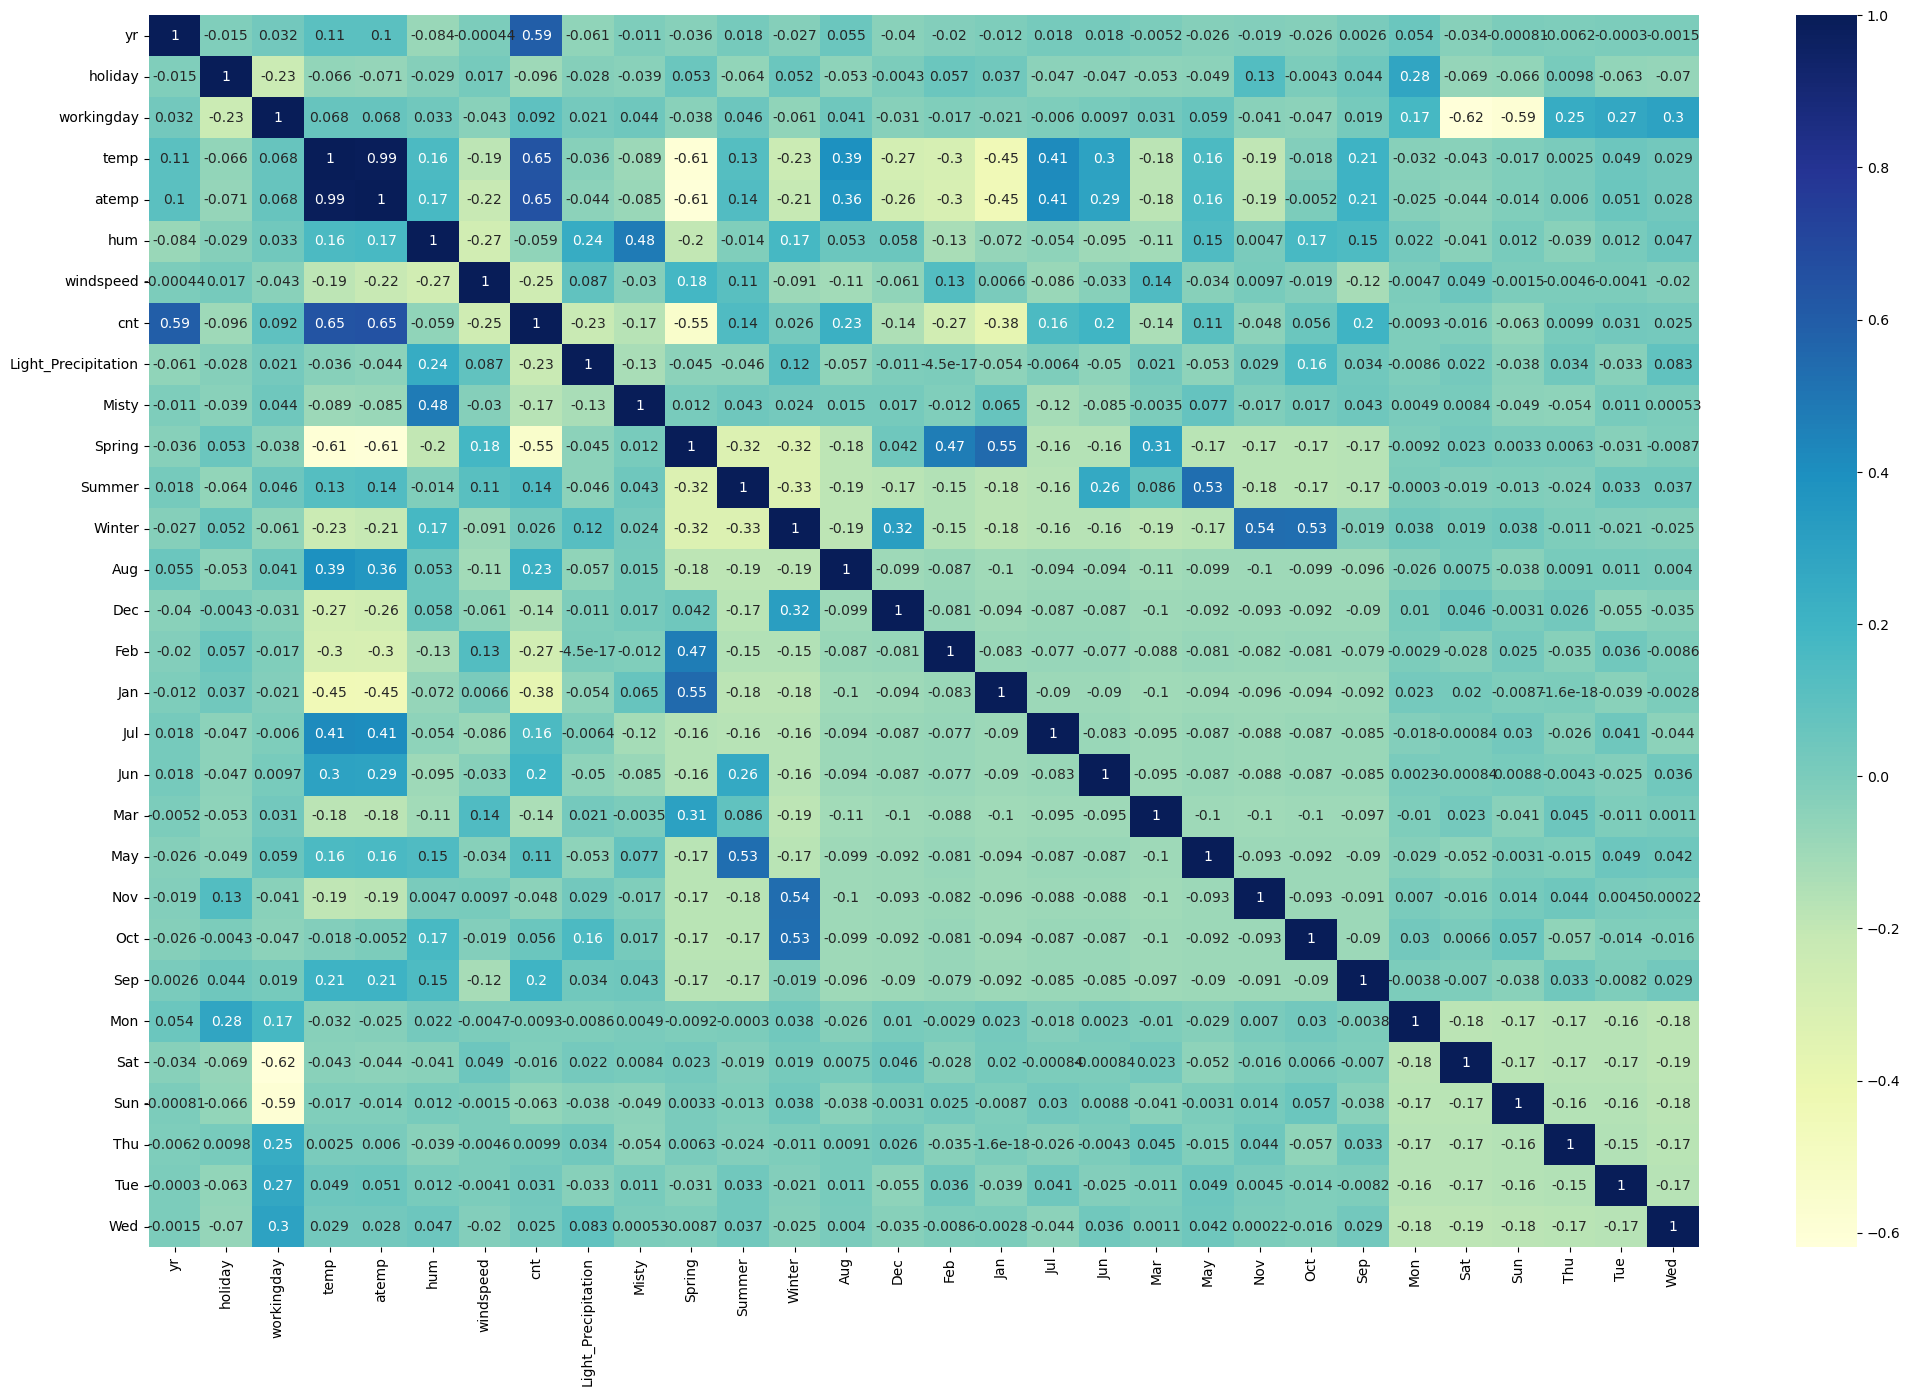

In [29]:
# heat map

plt.figure(figsize=(25,16))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [30]:
df_train.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light_Precipitation,Misty,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
yr,1.000000,-0.014980,0.031808,0.108054,0.104971,-0.084061,-0.000439,0.591433,-6.076399e-02,-0.011388,...,-0.025933,-0.018790,-0.025933,0.002574,0.053634,-0.033817,-0.000812,-6.153420e-03,-0.000296,-0.001452
holiday,-0.014980,1.000000,-0.233863,-0.066405,-0.070760,-0.029224,0.017458,-0.095948,-2.815377e-02,-0.038895,...,-0.049076,0.127543,-0.004302,0.043692,0.279279,-0.069242,-0.066102,9.759407e-03,-0.062897,-0.070276
workingday,0.031808,-0.233863,1.000000,0.068326,0.068349,0.032525,-0.042704,0.092019,2.115873e-02,0.043563,...,0.059006,-0.041271,-0.046584,0.019495,0.174565,-0.619074,-0.591001,2.465943e-01,0.268948,0.300501
temp,0.108054,-0.066405,0.068326,1.000000,0.989539,0.155252,-0.187281,0.645048,-3.622709e-02,-0.089452,...,0.155168,-0.194994,-0.018286,0.207212,-0.032455,-0.042608,-0.017367,2.518482e-03,0.048662,0.029020
atemp,0.104971,-0.070760,0.068349,0.989539,1.000000,0.169341,-0.215108,0.647944,-4.439780e-02,-0.085086,...,0.161665,-0.185918,-0.005162,0.205900,-0.025473,-0.043785,-0.014223,6.021767e-03,0.051493,0.027554
hum,-0.084061,-0.029224,0.032525,0.155252,0.169341,1.000000,-0.267126,-0.058793,2.449653e-01,0.479436,...,0.145409,0.004676,0.167153,0.152439,0.022296,-0.040858,0.011915,-3.853025e-02,0.012087,0.046866
windspeed,-0.000439,0.017458,-0.042704,-0.187281,-0.215108,-0.267126,1.000000,-0.253038,8.677832e-02,-0.029892,...,-0.034342,0.009742,-0.018546,-0.121930,-0.004658,0.049063,-0.001499,-4.619727e-03,-0.004101,-0.019862
cnt,0.591433,-0.095948,0.092019,0.645048,0.647944,-0.058793,-0.253038,1.000000,-2.266784e-01,-0.169715,...,0.113276,-0.048002,0.055558,0.201639,-0.009333,-0.015998,-0.063214,9.927716e-03,0.030528,0.025468
Light_Precipitation,-0.060764,-0.028154,0.021159,-0.036227,-0.044398,0.244965,0.086778,-0.226678,1.000000e+00,-0.126365,...,-0.052822,0.029177,0.156011,0.033894,-0.008580,0.021698,-0.038011,3.413944e-02,-0.033344,0.083112
Misty,-0.011388,-0.038895,0.043563,-0.089452,-0.085086,0.479436,-0.029892,-0.169715,-1.263648e-01,1.000000,...,0.076606,-0.017398,0.017231,0.043247,0.004924,0.008404,-0.049371,-5.419492e-02,0.010725,0.000531


In [31]:
# Starting off with one variable.
# Since Area has the highest correlation, we start with it. 

y_train  = df_train.pop('cnt')
X_train = df_train

In [32]:
# Building model with All Variables

bike_sharing_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Light_Precipitation', 'Misty', 'Spring', 'Summer', 'Winter',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [33]:
# build a model with all variables

X_train_sm = sm.add_constant(X_train)


# create. first model 

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

lr_model.params

const                  0.243298
yr                     0.232539
holiday                0.010892
workingday             0.096273
temp                   0.387984
atemp                  0.059045
hum                   -0.152016
windspeed             -0.183604
Light_Precipitation   -0.254975
Misty                 -0.059521
Spring                -0.045355
Summer                 0.042369
Winter                 0.107081
Aug                    0.022270
Dec                   -0.044274
Feb                   -0.032316
Jan                   -0.063064
Jul                   -0.032657
Jun                    0.006012
Mar                    0.001555
May                    0.025541
Nov                   -0.039818
Oct                    0.007713
Sep                    0.086761
Mon                   -0.021624
Sat                    0.095176
Sun                    0.040957
Thu                   -0.009730
Tue                   -0.018439
Wed                   -0.005897
dtype: float64

In [34]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.81e-180
Time:                        17:51:50   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2433      0.035      6.887      0.000       0.174       0.313
yr                      0.2325      0.008     28.794      0.000       0.217       0.248
holiday                 0.0109      0.024      0.451      0.652      -0.037       0.058
workingday              0.0963      0.012      7.835      0.000       0.072       0.120
temp                    0.3880      0.142      2.727      0.007       0.108       0.668
atemp                   0.0590      0.138      0.426      0.670      -0.213       0.331
hum                    -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed              -0.1836      0.026     -6.962      0.000      -0.235      -0.132
Light_Precipitation    -0.2550      0.026     -9.631      0.000      -0.307      -0.203
Misty                  -0.0595      0.010     -5.701      0.000      -0.080      -0.039
Spring                 -0.0454      0.030     -1.511      0.131      -0.104       0.014
Summer                  0.0424      0.026      1.617      0.107      -0.009       0.094
Winter                  0.1071      0.028      3.826      0.000       0.052       0.162
Aug                     0.0223      0.034      0.657      0.511      -0.044       0.089
Dec                    -0.0443      0.034     -1.316      0.189      -0.110       0.022
Feb                    -0.0323      0.033     -0.980      0.327      -0.097       0.032
Jan                    -0.0631      0.034     -1.876      0.061      -0.129       0.003
Jul                    -0.0327      0.035     -0.931      0.352      -0.102       0.036
Jun                     0.0060      0.025      0.241      0.810      -0.043       0.055
Mar                     0.0016      0.025      0.063      0.950      -0.047       0.050
May                     0.0255      0.021      1.208      0.228      -0.016       0.067
Nov                    -0.0398      0.036     -1.093      0.275      -0.111       0.032
Oct                     0.0077      0.036      0.215      0.830      -0.063       0.078
Sep                     0.0868      0.032      2.711      0.007       0.024       0.150
Mon                    -0.0216      0.015     -1.401      0.162      -0.052       0.009
Sat                     0.0952      0.014      6.910      0.000       0.068       0.122
Sun                     0.0410      0.014      2.929      0.004       0.013       0.068
Thu                    -0.0097      0.016     -0.623      0.534      -0.040       0.021
Tue                    -0.0184      0.016     -1.184      0.237      -0.049       0.012
Wed                    -0.0059      0.015     -0.394      0.694      -0.035       0.023
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):       

In [35]:
# calculating the vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.56
3,temp,66.90
4,atemp,56.03
24,Sat,19.71
25,Sun,18.34
9,Spring,10.77
11,Winter,9.46
10,Summer,8.29
20,Nov,6.79
12,Aug,6.47


In [36]:
# Dropping the atemp variable since it has a large p-value
X=X_train.drop('atemp',axis=1)

In [37]:
# Create another model 

# build a model with all variables

X_train_sm = sm.add_constant(X)


# create. first model 

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          3.00e-181
Time:                        17:51:50   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2431      0.035      6.888      0.000       0.174       0.312
yr                      0.2324      0.008     28.819      0.000       0.217       0.248
holiday                 0.0100      0.024      0.418      0.676      -0.037       0.057
workingday              0.0962      0.012      7.835      0.000       0.072       0.120
temp                    0.4454      0.046      9.628      0.000       0.354       0.536
hum                    -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed              -0.1860      0.026     -7.226      0.000      -0.237      -0.135
Light_Precipitation    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Misty                  -0.0596      0.010     -5.709      0.000      -0.080      -0.039
Spring                 -0.0448      0.030     -1.496      0.135      -0.104       0.014
Summer                  0.0430      0.026      1.645      0.101      -0.008       0.094
Winter                  0.1076      0.028      3.853      0.000       0.053       0.163
Aug                     0.0204      0.034      0.607      0.544      -0.046       0.086
Dec                    -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb                    -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan                    -0.0633      0.034     -1.885      0.060      -0.129       0.003
Jul                    -0.0338      0.035     -0.969      0.333      -0.102       0.035
Jun                     0.0046      0.025      0.186      0.853      -0.044       0.053
Mar                     0.0013      0.025      0.052      0.959      -0.047       0.050
May                     0.0247      0.021      1.173      0.241      -0.017       0.066
Nov                    -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct                     0.0075      0.036      0.210      0.834      -0.063       0.078
Sep                     0.0859      0.032      2.692      0.007       0.023       0.149
Mon                    -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat                     0.0956      0.014      6.958      0.000       0.069       0.123
Sun                     0.0413      0.014      2.964      0.003       0.014       0.069
Thu                    -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue                    -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed                    -0.0055      0.015     -0.368      0.713      -0.035       0.024
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                         

In [38]:
# calculating the vif 
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.54
23,Sat,19.71
24,Sun,18.34
8,Spring,10.75
10,Winter,9.44
9,Summer,8.27
3,temp,7.08
19,Nov,6.79
20,Oct,6.47
11,Aug,6.36


In [39]:
# Dropping the Mar variable since it has high p-value
X=X.drop('Mar',axis=1)

In [40]:
# Create another model 

# build a model with all variables

X_train_sm = sm.add_constant(X)


# create. first model 

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.87e-182
Time:                        17:51:50   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2437      0.033      7.378      0.000       0.179       0.309
yr                      0.2324      0.008     28.848      0.000       0.217       0.248
holiday                 0.0102      0.024      0.427      0.670      -0.037       0.057
workingday              0.0963      0.012      8.149      0.000       0.073       0.120
temp                    0.4450      0.046      9.763      0.000       0.355       0.535
hum                    -0.1513      0.038     -3.942      0.000      -0.227      -0.076
windspeed              -0.1861      0.026     -7.245      0.000      -0.237      -0.136
Light_Precipitation    -0.2558      0.026     -9.709      0.000      -0.308      -0.204
Misty                  -0.0596      0.010     -5.716      0.000      -0.080      -0.039
Spring                 -0.0443      0.028     -1.563      0.119      -0.100       0.011
Summer                  0.0427      0.026      1.668      0.096      -0.008       0.093
Winter                  0.1079      0.027      3.934      0.000       0.054       0.162
Aug                     0.0198      0.032      0.627      0.531      -0.042       0.082
Dec                    -0.0454      0.026     -1.748      0.081      -0.096       0.006
Feb                    -0.0337      0.022     -1.512      0.131      -0.078       0.010
Jan                    -0.0646      0.022     -2.892      0.004      -0.109      -0.021
Jul                    -0.0344      0.033     -1.035      0.301      -0.100       0.031
Jun                     0.0042      0.023      0.179      0.858      -0.042       0.050
May                     0.0243      0.020      1.235      0.218      -0.014       0.063
Nov                    -0.0409      0.031     -1.329      0.185      -0.101       0.020
Oct                     0.0066      0.031      0.215      0.830      -0.054       0.067
Sep                     0.0852      0.029      2.945      0.003       0.028       0.142
Mon                    -0.0209      0.015     -1.366      0.173      -0.051       0.009
Sat                     0.0957      0.013      7.203      0.000       0.070       0.122
Sun                     0.0415      0.014      3.044      0.002       0.015       0.068
Thu                    -0.0091      0.016     -0.587      0.558      -0.040       0.021
Tue                    -0.0179      0.015     -1.157      0.248      -0.048       0.013
Wed                    -0.0055      0.015     -0.368      0.713      -0.035       0.024
==============================================================================
Omnibus:                       83.692   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.031
Skew:                          -0.798   Prob(JB):                     4.12e-51
Kurtosis:                       5.893  

In [41]:
# calculating the vif 
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,workingday,74.85
22,Sat,17.21
23,Sun,16.19
8,Spring,9.65
10,Winter,9.12
9,Summer,7.95
3,temp,6.89
11,Aug,5.64
15,Jul,5.08
18,Nov,4.86


In [42]:
# Dropping Jun variable since it has the highest p-value
X=X.drop('Jun',axis=1)

In [43]:
# Create another model 

# build a model with all variables

X_train_sm = sm.add_constant(X)


# create. first model 

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.72e-183
Time:                        17:51:50   Log-Likelihood:                 527.01
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -891.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2442      0.033      7.428      0.000       0.180       0.309
yr                      0.2323      0.008     28.999      0.000       0.217       0.248
holiday                 0.0101      0.024      0.423      0.672      -0.037       0.057
workingday              0.0965      0.012      8.186      0.000       0.073       0.120
temp                    0.4493      0.039     11.630      0.000       0.373       0.525
hum                    -0.1521      0.038     -3.990      0.000      -0.227      -0.077
windspeed              -0.1865      0.026     -7.302      0.000      -0.237      -0.136
Light_Precipitation    -0.2557      0.026     -9.717      0.000      -0.307      -0.204
Misty                  -0.0595      0.010     -5.720      0.000      -0.080      -0.039
Spring                 -0.0459      0.027     -1.704      0.089      -0.099       0.007
Summer                  0.0416      0.025      1.678      0.094      -0.007       0.090
Winter                  0.1070      0.027      3.972      0.000       0.054       0.160
Aug                     0.0163      0.025      0.656      0.512      -0.033       0.065
Dec                    -0.0457      0.026     -1.768      0.078      -0.097       0.005
Feb                    -0.0334      0.022     -1.504      0.133      -0.077       0.010
Jan                    -0.0640      0.022     -2.902      0.004      -0.107      -0.021
Jul                    -0.0381      0.026     -1.481      0.139      -0.089       0.012
May                     0.0226      0.017      1.305      0.192      -0.011       0.057
Nov                    -0.0417      0.030     -1.370      0.171      -0.101       0.018
Oct                     0.0052      0.030      0.176      0.860      -0.053       0.064
Sep                     0.0825      0.024      3.381      0.001       0.035       0.130
Mon                    -0.0209      0.015     -1.364      0.173      -0.051       0.009
Sat                     0.0960      0.013      7.265      0.000       0.070       0.122
Sun                     0.0417      0.014      3.077      0.002       0.015       0.068
Thu                    -0.0091      0.015     -0.589      0.556      -0.040       0.021
Tue                    -0.0180      0.015     -1.160      0.247      -0.048       0.012
Wed                    -0.0054      0.015     -0.365      0.715      -0.035       0.024
==============================================================================
Omnibus:                       83.211   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.904
Skew:                          -0.796   Prob(JB):                     1.97e-50
Kurtosis:                       5.870   Cond. No.                     1.50e+15
================================================

In [44]:
# calculating the vif 
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,workingday,74.29
21,Sat,17.04
22,Sun,16.03
10,Winter,8.81
8,Spring,8.72
9,Summer,7.47
3,temp,4.96
17,Nov,4.76
18,Oct,4.45
1,holiday,4.11


In [45]:
# # Dropping Oct variable since it has the highest p-value

X=X.drop('Oct',axis=1)

In [46]:
# Create another model 

# build a model with all variables

X_train_sm = sm.add_constant(X)


# create. first model 

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.53e-184
Time:                        17:51:51   Log-Likelihood:                 526.99
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2453      0.032      7.603      0.000       0.182       0.309
yr                      0.2323      0.008     29.032      0.000       0.217       0.248
holiday                 0.0107      0.024      0.453      0.651      -0.036       0.057
workingday              0.0966      0.012      8.230      0.000       0.074       0.120
temp                    0.4487      0.038     11.669      0.000       0.373       0.524
hum                    -0.1512      0.038     -4.003      0.000      -0.225      -0.077
windspeed              -0.1862      0.025     -7.313      0.000      -0.236      -0.136
Light_Precipitation    -0.2556      0.026     -9.726      0.000      -0.307      -0.204
Misty                  -0.0595      0.010     -5.737      0.000      -0.080      -0.039
Spring                 -0.0466      0.027     -1.747      0.081      -0.099       0.006
Summer                  0.0401      0.023      1.722      0.086      -0.006       0.086
Winter                  0.1096      0.023      4.826      0.000       0.065       0.154
Aug                     0.0150      0.024      0.633      0.527      -0.031       0.061
Dec                    -0.0490      0.018     -2.689      0.007      -0.085      -0.013
Feb                    -0.0344      0.021     -1.602      0.110      -0.077       0.008
Jan                    -0.0650      0.021     -3.059      0.002      -0.107      -0.023
Jul                    -0.0395      0.025     -1.600      0.110      -0.088       0.009
May                     0.0226      0.017      1.307      0.192      -0.011       0.057
Nov                    -0.0459      0.019     -2.421      0.016      -0.083      -0.009
Sep                     0.0804      0.021      3.748      0.000       0.038       0.123
Mon                    -0.0209      0.015     -1.370      0.171      -0.051       0.009
Sat                     0.0961      0.013      7.298      0.000       0.070       0.122
Sun                     0.0419      0.013      3.105      0.002       0.015       0.068
Thu                    -0.0092      0.015     -0.591      0.555      -0.040       0.021
Tue                    -0.0180      0.015     -1.164      0.245      -0.048       0.012
Wed                    -0.0055      0.015     -0.367      0.714      -0.035       0.024
==============================================================================
Omnibus:                       82.670   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.459
Skew:                          -0.792   Prob(JB):                     6.69e-50
Kurtosis:                       5.854   Cond. No.                     1.48e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance ma

In [47]:
# Calculating VIF after dropping Oct
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,workingday,72.11
20,Sat,16.55
21,Sun,15.54
8,Spring,8.55
9,Summer,6.60
10,Winter,6.27
3,temp,4.92
1,holiday,3.96
11,Aug,3.17
15,Jul,2.81


In [48]:
# Dropping Aug variable since it has the highest p-value

X=X.drop('Aug',axis=1)

# Create another model 

# build a model with all variables

X_train_sm = sm.add_constant(X)


# create. first model 

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     122.0
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.76e-185
Time:                        17:51:51   Log-Likelihood:                 526.78
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -903.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2520      0.030      8.274      0.000       0.192       0.312
yr                      0.2324      0.008     29.082      0.000       0.217       0.248
holiday                 0.0121      0.023      0.517      0.605      -0.034       0.058
workingday              0.0984      0.011      8.624      0.000       0.076       0.121
temp                    0.4505      0.038     11.753      0.000       0.375       0.526
hum                    -0.1501      0.038     -3.981      0.000      -0.224      -0.076
windspeed              -0.1864      0.025     -7.324      0.000      -0.236      -0.136
Light_Precipitation    -0.2564      0.026     -9.774      0.000      -0.308      -0.205
Misty                  -0.0593      0.010     -5.722      0.000      -0.080      -0.039
Spring                 -0.0561      0.022     -2.560      0.011      -0.099      -0.013
Summer                  0.0300      0.017      1.771      0.077      -0.003       0.063
Winter                  0.1007      0.018      5.640      0.000       0.066       0.136
Dec                    -0.0497      0.018     -2.737      0.006      -0.085      -0.014
Feb                    -0.0344      0.021     -1.603      0.109      -0.077       0.008
Jan                    -0.0650      0.021     -3.061      0.002      -0.107      -0.023
Jul                    -0.0501      0.018     -2.783      0.006      -0.085      -0.015
May                     0.0223      0.017      1.289      0.198      -0.012       0.056
Nov                    -0.0468      0.019     -2.481      0.013      -0.084      -0.010
Sep                     0.0719      0.017      4.312      0.000       0.039       0.105
Mon                    -0.0211      0.015     -1.382      0.167      -0.051       0.009
Sat                     0.0981      0.013      7.672      0.000       0.073       0.123
Sun                     0.0434      0.013      3.274      0.001       0.017       0.070
Thu                    -0.0093      0.015     -0.602      0.547      -0.040       0.021
Tue                    -0.0179      0.015     -1.160      0.247      -0.048       0.012
Wed                    -0.0056      0.015     -0.374      0.708      -0.035       0.024
==============================================================================
Omnibus:                       83.860   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.625
Skew:                          -0.804   Prob(JB):                     1.37e-50
Kurtosis:                       5.867   Cond. No.                     1.47e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.25e-28. This

In [49]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,workingday,64.22
19,Sat,14.64
20,Sun,13.95
8,Spring,5.80
3,temp,4.90
10,Winter,3.88
1,holiday,3.69
9,Summer,3.49
13,Jan,2.38
4,hum,1.98


In [50]:
# Dropping Wed variable since it has the highest p-value

X=X.drop('Wed',axis=1)

# Create another model 

# build a model with all variables

X_train_sm = sm.add_constant(X)


# create. first model 

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.8
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.59e-186
Time:                        17:51:51   Log-Likelihood:                 526.71
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     487   BIC:                            -910.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2514      0.030      8.273      0.000       0.192       0.311
yr                      0.2324      0.008     29.106      0.000       0.217       0.248
holiday                 0.0107      0.023      0.462      0.644      -0.035       0.056
workingday              0.0966      0.010      9.325      0.000       0.076       0.117
temp                    0.4501      0.038     11.757      0.000       0.375       0.525
hum                    -0.1507      0.038     -4.003      0.000      -0.225      -0.077
windspeed              -0.1864      0.025     -7.330      0.000      -0.236      -0.136
Light_Precipitation    -0.2571      0.026     -9.831      0.000      -0.308      -0.206
Misty                  -0.0591      0.010     -5.715      0.000      -0.079      -0.039
Spring                 -0.0564      0.022     -2.574      0.010      -0.099      -0.013
Summer                  0.0297      0.017      1.759      0.079      -0.003       0.063
Winter                  0.1006      0.018      5.641      0.000       0.066       0.136
Dec                    -0.0497      0.018     -2.737      0.006      -0.085      -0.014
Feb                    -0.0344      0.021     -1.604      0.109      -0.076       0.008
Jan                    -0.0651      0.021     -3.068      0.002      -0.107      -0.023
Jul                    -0.0499      0.018     -2.775      0.006      -0.085      -0.015
May                     0.0223      0.017      1.293      0.197      -0.012       0.056
Nov                    -0.0472      0.019     -2.504      0.013      -0.084      -0.010
Sep                     0.0717      0.017      4.307      0.000       0.039       0.104
Mon                    -0.0181      0.013     -1.400      0.162      -0.043       0.007
Sat                     0.0994      0.012      8.081      0.000       0.075       0.124
Sun                     0.0447      0.013      3.498      0.001       0.020       0.070
Thu                    -0.0062      0.013     -0.476      0.634      -0.032       0.019
Tue                    -0.0148      0.013     -1.136      0.257      -0.041       0.011
==============================================================================
Omnibus:                       83.376   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.263
Skew:                          -0.799   Prob(JB):                     2.71e-50
Kurtosis:                       5.861   Cond. No.                     1.47e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.25e-28. This might indicate that there are
strong multicollinearity problems or that the design matr

In [51]:
# Recalcuating vif
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,workingday,62.38
19,Sat,14.61
20,Sun,13.92
8,Spring,5.79
3,temp,4.90
10,Winter,3.88
1,holiday,3.63
9,Summer,3.49
13,Jan,2.38
4,hum,1.97


In [52]:
# Dropping Thu variable since it has the highest p-value

X=X.drop('Thu',axis=1)

# Create another model 

# build a model with all variables

X_train_sm = sm.add_constant(X)


# create. first model 

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.47e-187
Time:                        17:51:51   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2503      0.030      8.267      0.000       0.191       0.310
yr                      0.2324      0.008     29.128      0.000       0.217       0.248
holiday                 0.0091      0.023      0.398      0.690      -0.036       0.054
workingday              0.0954      0.010      9.482      0.000       0.076       0.115
temp                    0.4502      0.038     11.769      0.000       0.375       0.525
hum                    -0.1505      0.038     -4.001      0.000      -0.224      -0.077
windspeed              -0.1864      0.025     -7.338      0.000      -0.236      -0.137
Light_Precipitation    -0.2573      0.026     -9.847      0.000      -0.309      -0.206
Misty                  -0.0588      0.010     -5.703      0.000      -0.079      -0.039
Spring                 -0.0564      0.022     -2.576      0.010      -0.099      -0.013
Summer                  0.0298      0.017      1.766      0.078      -0.003       0.063
Winter                  0.1009      0.018      5.663      0.000       0.066       0.136
Dec                    -0.0500      0.018     -2.758      0.006      -0.086      -0.014
Feb                    -0.0340      0.021     -1.591      0.112      -0.076       0.008
Jan                    -0.0650      0.021     -3.067      0.002      -0.107      -0.023
Jul                    -0.0498      0.018     -2.770      0.006      -0.085      -0.014
May                     0.0224      0.017      1.299      0.195      -0.012       0.056
Nov                    -0.0476      0.019     -2.534      0.012      -0.085      -0.011
Sep                     0.0716      0.017      4.303      0.000       0.039       0.104
Mon                    -0.0160      0.012     -1.317      0.188      -0.040       0.008
Sat                     0.1002      0.012      8.236      0.000       0.076       0.124
Sun                     0.0456      0.013      3.596      0.000       0.021       0.070
Tue                    -0.0129      0.012     -1.040      0.299      -0.037       0.011
==============================================================================
Omnibus:                       83.893   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.497
Skew:                          -0.803   Prob(JB):                     8.87e-51
Kurtosis:                       5.875   Cond. No.                     1.46e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.26e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
# Recalculating VIF after dropping a variable
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,workingday,61.40
19,Sat,14.60
20,Sun,13.92
8,Spring,5.79
3,temp,4.90
10,Winter,3.88
1,holiday,3.58
9,Summer,3.49
13,Jan,2.38
4,hum,1.97


In [54]:
# Dropping Tue variable since it has the highest p-value

X=X.drop('Tue',axis=1)

# Create another model 

# build a model with all variables

X_train_sm = sm.add_constant(X)


# create. first model 

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.7
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          3.51e-188
Time:                        17:51:51   Log-Likelihood:                 526.03
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2500      0.030      8.256      0.000       0.190       0.309
yr                      0.2323      0.008     29.122      0.000       0.217       0.248
holiday                 0.0080      0.023      0.353      0.725      -0.037       0.053
workingday              0.0936      0.010      9.445      0.000       0.074       0.113
temp                    0.4505      0.038     11.777      0.000       0.375       0.526
hum                    -0.1518      0.038     -4.038      0.000      -0.226      -0.078
windspeed              -0.1869      0.025     -7.358      0.000      -0.237      -0.137
Light_Precipitation    -0.2557      0.026     -9.802      0.000      -0.307      -0.204
Misty                  -0.0586      0.010     -5.683      0.000      -0.079      -0.038
Spring                 -0.0562      0.022     -2.566      0.011      -0.099      -0.013
Summer                  0.0296      0.017      1.751      0.081      -0.004       0.063
Winter                  0.1004      0.018      5.639      0.000       0.065       0.135
Dec                    -0.0492      0.018     -2.718      0.007      -0.085      -0.014
Feb                    -0.0350      0.021     -1.636      0.102      -0.077       0.007
Jan                    -0.0649      0.021     -3.062      0.002      -0.107      -0.023
Jul                    -0.0507      0.018     -2.825      0.005      -0.086      -0.015
May                     0.0222      0.017      1.285      0.199      -0.012       0.056
Nov                    -0.0475      0.019     -2.525      0.012      -0.084      -0.011
Sep                     0.0718      0.017      4.314      0.000       0.039       0.104
Mon                    -0.0130      0.012     -1.102      0.271      -0.036       0.010
Sat                     0.1014      0.012      8.371      0.000       0.078       0.125
Sun                     0.0469      0.013      3.722      0.000       0.022       0.072
==============================================================================
Omnibus:                       84.077   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.009
Skew:                          -0.797   Prob(JB):                     5.64e-52
Kurtosis:                       5.926   Cond. No.                     1.46e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.26e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,workingday,61.21
19,Sat,14.60
20,Sun,13.91
8,Spring,5.79
3,temp,4.90
10,Winter,3.88
1,holiday,3.58
9,Summer,3.49
13,Jan,2.38
4,hum,1.97


In [56]:
# Dropping Holiday variable since it has the highest p-value

X=X.drop('holiday',axis=1)

# Create another model 

# build a model with all variables

X_train_sm = sm.add_constant(X)


# create. first model 

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.7
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          3.51e-188
Time:                        17:51:51   Log-Likelihood:                 526.03
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2580      0.046      5.582      0.000       0.167       0.349
yr                      0.2323      0.008     29.122      0.000       0.217       0.248
workingday              0.0856      0.026      3.254      0.001       0.034       0.137
temp                    0.4505      0.038     11.777      0.000       0.375       0.526
hum                    -0.1518      0.038     -4.038      0.000      -0.226      -0.078
windspeed              -0.1869      0.025     -7.358      0.000      -0.237      -0.137
Light_Precipitation    -0.2557      0.026     -9.802      0.000      -0.307      -0.204
Misty                  -0.0586      0.010     -5.683      0.000      -0.079      -0.038
Spring                 -0.0562      0.022     -2.566      0.011      -0.099      -0.013
Summer                  0.0296      0.017      1.751      0.081      -0.004       0.063
Winter                  0.1004      0.018      5.639      0.000       0.065       0.135
Dec                    -0.0492      0.018     -2.718      0.007      -0.085      -0.014
Feb                    -0.0350      0.021     -1.636      0.102      -0.077       0.007
Jan                    -0.0649      0.021     -3.062      0.002      -0.107      -0.023
Jul                    -0.0507      0.018     -2.825      0.005      -0.086      -0.015
May                     0.0222      0.017      1.285      0.199      -0.012       0.056
Nov                    -0.0475      0.019     -2.525      0.012      -0.084      -0.011
Sep                     0.0718      0.017      4.314      0.000       0.039       0.104
Mon                    -0.0130      0.012     -1.102      0.271      -0.036       0.010
Sat                     0.0934      0.028      3.289      0.001       0.038       0.149
Sun                     0.0389      0.029      1.364      0.173      -0.017       0.095
==============================================================================
Omnibus:                       84.077   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.009
Skew:                          -0.797   Prob(JB):                     5.64e-52
Kurtosis:                       5.926   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
3,hum,35.40
2,temp,22.60
1,workingday,19.79
7,Spring,6.09
18,Sat,5.49
19,Sun,5.26
4,windspeed,5.09
9,Winter,4.45
8,Summer,3.75
12,Jan,2.43


In [58]:
# Dropping Mon variable since it has the highest p-value

X=X.drop('Mon',axis=1)

# Create another model 

# build a model with all variables

X_train_sm = sm.add_constant(X)


# create. first model 

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          5.20e-189
Time:                        17:51:51   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2478      0.045      5.472      0.000       0.159       0.337
yr                      0.2318      0.008     29.103      0.000       0.216       0.247
workingday              0.0933      0.025      3.679      0.000       0.043       0.143
temp                    0.4527      0.038     11.846      0.000       0.378       0.528
hum                    -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed              -0.1873      0.025     -7.371      0.000      -0.237      -0.137
Light_Precipitation    -0.2549      0.026     -9.773      0.000      -0.306      -0.204
Misty                  -0.0583      0.010     -5.655      0.000      -0.079      -0.038
Spring                 -0.0553      0.022     -2.528      0.012      -0.098      -0.012
Summer                  0.0295      0.017      1.747      0.081      -0.004       0.063
Winter                  0.1001      0.018      5.618      0.000       0.065       0.135
Dec                    -0.0488      0.018     -2.692      0.007      -0.084      -0.013
Feb                    -0.0348      0.021     -1.626      0.105      -0.077       0.007
Jan                    -0.0650      0.021     -3.067      0.002      -0.107      -0.023
Jul                    -0.0510      0.018     -2.844      0.005      -0.086      -0.016
May                     0.0229      0.017      1.325      0.186      -0.011       0.057
Nov                    -0.0461      0.019     -2.456      0.014      -0.083      -0.009
Sep                     0.0723      0.017      4.349      0.000       0.040       0.105
Sat                     0.1036      0.027      3.864      0.000       0.051       0.156
Sun                     0.0492      0.027      1.827      0.068      -0.004       0.102
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
3,hum,34.75
2,temp,22.48
1,workingday,19.11
7,Spring,6.06
17,Sat,5.10
4,windspeed,5.06
18,Sun,4.89
9,Winter,4.40
8,Summer,3.71
12,Jan,2.42


In [60]:
# Dropping May variable since it has the highest p-value

X=X.drop('May',axis=1)

# Create another model 

# build a model with all variables

X_train_sm = sm.add_constant(X)


# create. first model 

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          9.80e-190
Time:                        17:51:52   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2368      0.045      5.315      0.000       0.149       0.324
yr                      0.2312      0.008     29.052      0.000       0.216       0.247
workingday              0.0942      0.025      3.713      0.000       0.044       0.144
temp                    0.4616      0.038     12.262      0.000       0.388       0.536
hum                    -0.1477      0.037     -3.958      0.000      -0.221      -0.074
windspeed              -0.1889      0.025     -7.441      0.000      -0.239      -0.139
Light_Precipitation    -0.2567      0.026     -9.849      0.000      -0.308      -0.206
Misty                  -0.0585      0.010     -5.668      0.000      -0.079      -0.038
Spring                 -0.0515      0.022     -2.373      0.018      -0.094      -0.009
Summer                  0.0393      0.015      2.586      0.010       0.009       0.069
Winter                  0.1021      0.018      5.752      0.000       0.067       0.137
Dec                    -0.0474      0.018     -2.619      0.009      -0.083      -0.012
Feb                    -0.0334      0.021     -1.562      0.119      -0.075       0.009
Jan                    -0.0634      0.021     -2.991      0.003      -0.105      -0.022
Jul                    -0.0515      0.018     -2.868      0.004      -0.087      -0.016
Nov                    -0.0444      0.019     -2.371      0.018      -0.081      -0.008
Sep                     0.0723      0.017      4.346      0.000       0.040       0.105
Sat                     0.1040      0.027      3.875      0.000       0.051       0.157
Sun                     0.0500      0.027      1.855      0.064      -0.003       0.103
==============================================================================
Omnibus:                       80.597   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.714
Skew:                          -0.784   Prob(JB):                     3.91e-47
Kurtosis:                       5.757   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
3,hum,34.64
2,temp,22.30
1,workingday,18.92
7,Spring,6.05
16,Sat,5.04
4,windspeed,4.99
17,Sun,4.85
9,Winter,4.40
8,Summer,3.11
12,Jan,2.42


In [62]:
# Dropping Feb variable since it has the highest p-value

X=X.drop('Feb',axis=1)

# Create another model 

# build a model with all variables

X_train_sm = sm.add_constant(X)


# create. first model 

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.52e-190
Time:                        17:51:52   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2235      0.044      5.103      0.000       0.137       0.310
yr                      0.2309      0.008     28.978      0.000       0.215       0.247
workingday              0.0964      0.025      3.801      0.000       0.047       0.146
temp                    0.4764      0.036     13.064      0.000       0.405       0.548
hum                    -0.1494      0.037     -4.001      0.000      -0.223      -0.076
windspeed              -0.1879      0.025     -7.390      0.000      -0.238      -0.138
Light_Precipitation    -0.2555      0.026     -9.791      0.000      -0.307      -0.204
Misty                  -0.0583      0.010     -5.637      0.000      -0.079      -0.038
Spring                 -0.0607      0.021     -2.899      0.004      -0.102      -0.020
Summer                  0.0424      0.015      2.809      0.005       0.013       0.072
Winter                  0.1038      0.018      5.845      0.000       0.069       0.139
Dec                    -0.0388      0.017     -2.248      0.025      -0.073      -0.005
Jan                    -0.0455      0.018     -2.548      0.011      -0.081      -0.010
Jul                    -0.0524      0.018     -2.916      0.004      -0.088      -0.017
Nov                    -0.0399      0.019     -2.152      0.032      -0.076      -0.003
Sep                     0.0737      0.017      4.430      0.000       0.041       0.106
Sat                     0.1068      0.027      3.984      0.000       0.054       0.160
Sun                     0.0520      0.027      1.931      0.054      -0.001       0.105
==============================================================================
Omnibus:                       76.194   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.529
Skew:                          -0.745   Prob(JB):                     2.85e-44
Kurtosis:                       5.687   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
3,hum,34.19
2,temp,21.56
1,workingday,18.84
7,Spring,5.06
15,Sat,5.03
4,windspeed,4.99
16,Sun,4.83
9,Winter,4.40
8,Summer,3.09
6,Misty,2.35


In [64]:
# Dropping Sun variable since it has the highest p-value

X=X.drop('Sun',axis=1)

# Create another model 

# build a model with all variables

X_train_sm = sm.add_constant(X)


# create. first model 

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          1.20e-190
Time:                        17:51:52   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2690      0.037      7.267      0.000       0.196       0.342
yr                      0.2311      0.008     28.929      0.000       0.215       0.247
workingday              0.0521      0.011      4.826      0.000       0.031       0.073
temp                    0.4744      0.037     12.978      0.000       0.403       0.546
hum                    -0.1480      0.037     -3.952      0.000      -0.222      -0.074
windspeed              -0.1883      0.025     -7.386      0.000      -0.238      -0.138
Light_Precipitation    -0.2552      0.026     -9.754      0.000      -0.307      -0.204
Misty                  -0.0581      0.010     -5.607      0.000      -0.078      -0.038
Spring                 -0.0624      0.021     -2.974      0.003      -0.104      -0.021
Summer                  0.0421      0.015      2.783      0.006       0.012       0.072
Winter                  0.1038      0.018      5.832      0.000       0.069       0.139
Dec                    -0.0398      0.017     -2.302      0.022      -0.074      -0.006
Jan                    -0.0465      0.018     -2.596      0.010      -0.082      -0.011
Jul                    -0.0514      0.018     -2.854      0.004      -0.087      -0.016
Nov                    -0.0441      0.018     -2.390      0.017      -0.080      -0.008
Sep                     0.0714      0.017      4.289      0.000       0.039       0.104
Sat                     0.0625      0.014      4.493      0.000       0.035       0.090
==============================================================================
Omnibus:                       82.403   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.435
Skew:                          -0.787   Prob(JB):                     4.10e-50
Kurtosis:                       5.867   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
3,hum,31.08
2,temp,18.94
1,workingday,4.77
4,windspeed,4.77
7,Spring,4.50
9,Winter,4.11
8,Summer,2.88
6,Misty,2.32
0,yr,2.09
15,Sat,1.86


In [66]:
# Dropping hum variable since it has the highest p-value

X=X.drop('hum',axis=1)

# Create another model 

# build a model with all variables

X_train_sm = sm.add_constant(X)


# create. first model 

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          1.84e-188
Time:                        17:51:52   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1985      0.033      6.031      0.000       0.134       0.263
yr                      0.2348      0.008     29.173      0.000       0.219       0.251
workingday              0.0547      0.011      5.009      0.000       0.033       0.076
temp                    0.4354      0.036     12.191      0.000       0.365       0.506
windspeed              -0.1609      0.025     -6.464      0.000      -0.210      -0.112
Light_Precipitation    -0.2969      0.024    -12.222      0.000      -0.345      -0.249
Misty                  -0.0818      0.009     -9.526      0.000      -0.099      -0.065
Spring                 -0.0713      0.021     -3.371      0.001      -0.113      -0.030
Summer                  0.0354      0.015      2.320      0.021       0.005       0.065
Winter                  0.0903      0.018      5.093      0.000       0.055       0.125
Dec                    -0.0467      0.017     -2.675      0.008      -0.081      -0.012
Jan                    -0.0526      0.018     -2.905      0.004      -0.088      -0.017
Jul                    -0.0466      0.018     -2.554      0.011      -0.082      -0.011
Nov                    -0.0447      0.019     -2.389      0.017      -0.081      -0.008
Sep                     0.0652      0.017      3.880      0.000       0.032       0.098
Sat                     0.0670      0.014      4.758      0.000       0.039       0.095
==============================================================================
Omnibus:                       85.035   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.570
Skew:                          -0.805   Prob(JB):                     9.50e-53
Kurtosis:                       5.946   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,temp,6.92
1,workingday,4.74
3,windspeed,4.71
6,Spring,3.09
8,Winter,3.03
7,Summer,2.33
0,yr,2.08
14,Sat,1.86
12,Nov,1.79
10,Jan,1.67


In [68]:
## p-value is less than 0.05 for all variables.
## Though the VIF is >5 for temp, dropping temp reduces the R-squared by a large margin. 

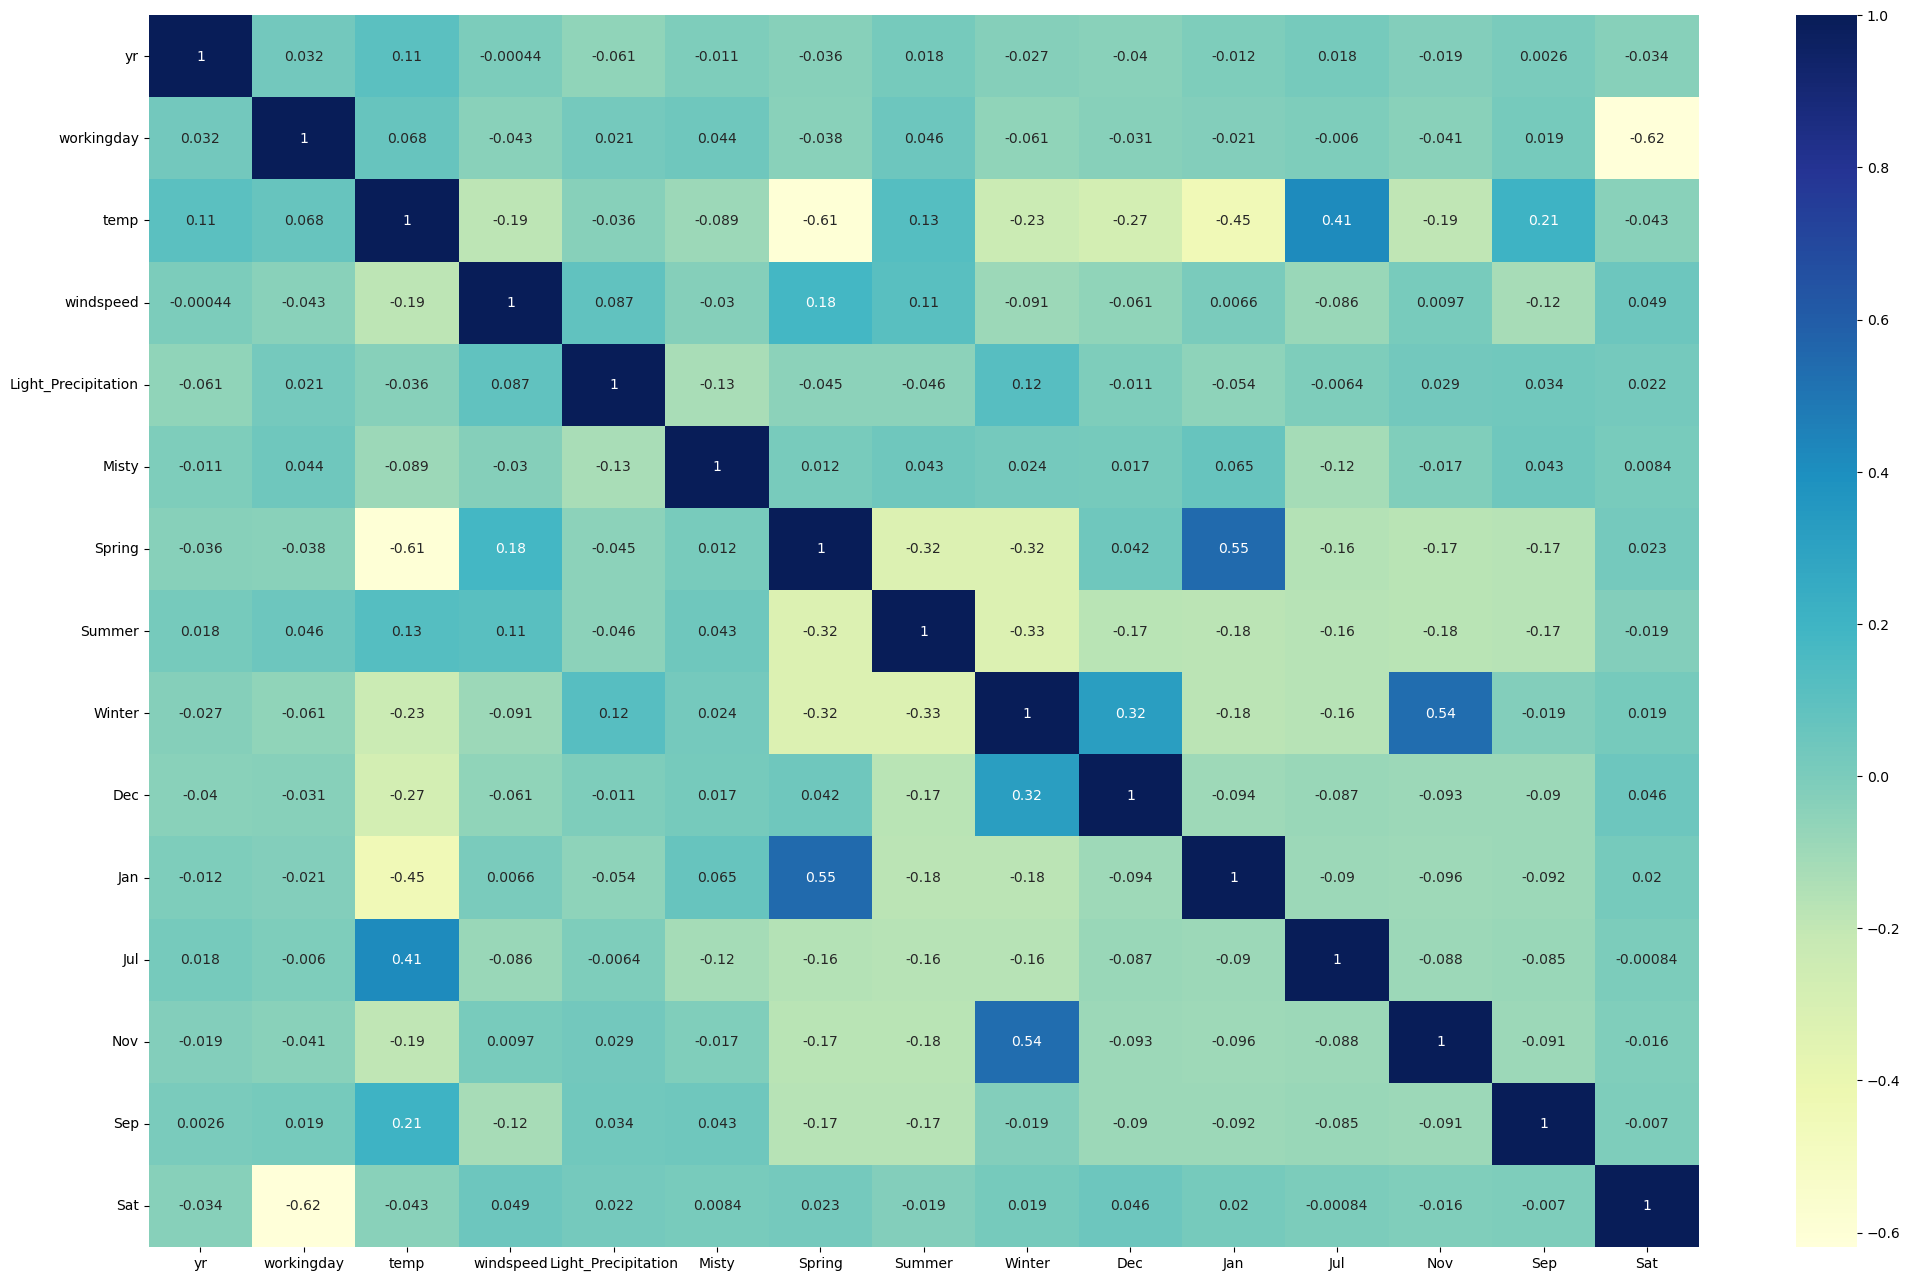

In [69]:
# heat map

plt.figure(figsize=(25,16))
sns.heatmap(X.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Residual Analysis

In [70]:
# predicing on training dataset
y_train_pred = lr_model.predict(X_train_sm)

<Axes: ylabel='Density'>

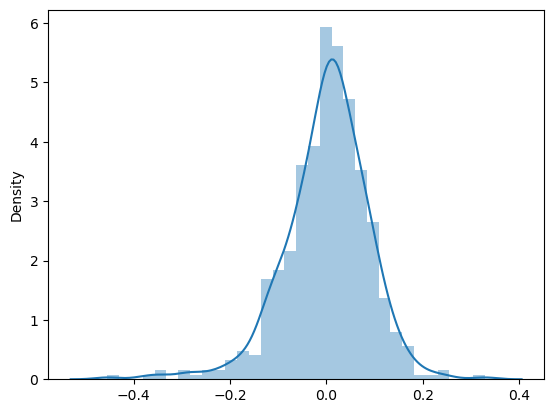

In [71]:
# calculating the residue
res = y_train - y_train_pred
sns.distplot(res)

### Prediction and Evaluation on the test Set

In [72]:
# Scaling the test variable
num_vars = ['holiday','temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light_Precipitation,Misty,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
184,0,1.0,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1,0.0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0.0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,1,...,0,0,1,0,0,0,0,1,0,0
221,0,0.0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0.0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,0,0,0,0,0,1,0,0


In [73]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light_Precipitation,Misty,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.027273,0.318182,...,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.163248,0.466833,...,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
y_test = df_test.pop('cnt')

In [75]:
X_test = df_test


In [76]:
# add constant 
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,Light_Precipitation,Misty,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
184,1.0,0,1.0,0,0.831783,0.769660,0.657364,0.084219,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1.0,1,0.0,1,0.901354,0.842587,0.610133,0.153728,0,0,...,0,0,0,0,0,0,0,0,0,1
299,1.0,0,0.0,1,0.511964,0.496145,0.837699,0.334206,0,1,...,0,0,1,0,0,0,0,1,0,0
221,1.0,0,0.0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,0,0,1
152,1.0,0,0.0,1,0.817246,0.741471,0.314298,0.537414,0,0,...,0,0,0,0,0,0,0,1,0,0


In [77]:
# Dropping the variable removed from the training set
X_test_sm = X_test_sm.drop(['atemp','Mar','Jun','Oct','Aug','Wed','Thu','Tue','holiday','Mon','May','Feb','Sun','hum'],axis=1 )


In [78]:
# Predict
y_test_pred= lr_model.predict(X_test_sm)

In [79]:
# Evaluate the model 

r2_score(y_true=y_test, y_pred=y_test_pred)

0.8168681962672556

### We notice that the r-squared value obtained on the test set prediction is close to what was obtained on the training set

## Linear Regression using RFE

In [80]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [81]:
# Splitting training and test set - 70:30 ratio
df_train_rfe, df_test_rfe = train_test_split(bike_sharing_data, train_size=0.7, random_state=100)
print(df_train_rfe.shape)
print(df_test_rfe.shape)

(510, 30)
(220, 30)


In [82]:
# Paradigm with most sklearn libraries classes
# fit() - learns xmin, xmax
# transform() - computes the x-xmin/xmax-xmin
# fit_transform() - same as fit and transform. 

# 1. Instantiate an object 

scaler = MinMaxScaler()

# 2. Fit on Data

num_vars = ['holiday','temp','atemp','hum','windspeed','cnt']

df_train_rfe[num_vars] = scaler.fit_transform(df_train_rfe[num_vars])
df_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light_Precipitation,Misty,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
576,1,0.0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0.0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0.0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0.0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,1,0,0,0,0
111,0,0.0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# Starting off with one variable.
# Since Area has the highest correlation, we start with it. 

y_train_rfe  = df_train_rfe.pop('cnt')
X_train_rfe = df_train_rfe

In [84]:
X_train_rfe.shape

(510, 29)

In [85]:
# Applying RFE on linear regression model
lm = LinearRegression()
lm.fit(X_train_rfe, y_train_rfe)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train_rfe, y_train_rfe)

In [86]:
list(zip(X_train_rfe.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Light_Precipitation', True, 1),
 ('Misty', True, 1),
 ('Spring', False, 7),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 5),
 ('Feb', False, 3),
 ('Jan', False, 2),
 ('Jul', False, 14),
 ('Jun', False, 15),
 ('Mar', False, 11),
 ('May', False, 4),
 ('Nov', False, 6),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 12),
 ('Tue', False, 10),
 ('Wed', False, 13)]

In [87]:
# variables that RFE retained
col = X_train_rfe.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Light_Precipitation', 'Misty', 'Summer', 'Winter', 'Aug', 'Oct', 'Sep',
       'Sat', 'Sun'],
      dtype='object')

In [88]:
# Variables dropped by RFE
X_train_rfe.columns[~rfe.support_]

Index(['atemp', 'Spring', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Mon', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [89]:
# creating X_test dataframe with RFE selected variables

X_train_rfe_cols = X_train_rfe[col]

In [90]:
X_train_rfe_cols = sm.add_constant(X_train_rfe_cols)

In [91]:
lm = sm.OLS(y_train_rfe, X_train_rfe_cols).fit()

In [92]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          8.70e-192
Time:                        17:51:53   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1640      0.022      7.507      0.000       0.121       0.207
yr                      0.2292      0.008     28.712      0.000       0.214       0.245
holiday                -0.0250      0.021     -1.205      0.229      -0.066       0.016
workingday              0.0749      0.009      8.548      0.000       0.058       0.092
temp                    0.5309      0.022     24.146      0.000       0.488       0.574
hum                    -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed              -0.1858      0.025     -7.353      0.000      -0.235      -0.136
Light_Precipitation    -0.2470      0.026     -9.484      0.000      -0.298      -0.196
Misty                  -0.0568      0.010     -5.482      0.000      -0.077      -0.036
Summer                  0.1049      0.011      9.778      0.000       0.084       0.126
Winter                  0.1349      0.012     11.306      0.000       0.111       0.158
Aug                     0.0557      0.016      3.457      0.001       0.024       0.087
Oct                     0.0385      0.017      2.230      0.026       0.005       0.072
Sep                     0.1252      0.016      7.757      0.000       0.093       0.157
Sat                     0.0834      0.011      7.657      0.000       0.062       0.105
Sun                     0.0307      0.012      2.670      0.008       0.008       0.053
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                     1.41e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.46e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [93]:
# Dropping holiday as it has high p-value
X_train_rfe_new = X_train_rfe_cols.drop(['holiday'], axis=1)

In [94]:
X_train_rfe_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed',
       'Light_Precipitation', 'Misty', 'Summer', 'Winter', 'Aug', 'Oct', 'Sep',
       'Sat', 'Sun'],
      dtype='object')

In [95]:
# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train_rfe, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          8.70e-192
Time:                        17:51:53   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1391      0.036      3.859      0.000       0.068       0.210
yr                      0.2292      0.008     28.712      0.000       0.214       0.245
workingday              0.0999      0.025      3.942      0.000       0.050       0.150
temp                    0.5309      0.022     24.146      0.000       0.488       0.574
hum                    -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed              -0.1858      0.025     -7.353      0.000      -0.235      -0.136
Light_Precipitation    -0.2470      0.026     -9.484      0.000      -0.298      -0.196
Misty                  -0.0568      0.010     -5.482      0.000      -0.077      -0.036
Summer                  0.1049      0.011      9.778      0.000       0.084       0.126
Winter                  0.1349      0.012     11.306      0.000       0.111       0.158
Aug                     0.0557      0.016      3.457      0.001       0.024       0.087
Oct                     0.0385      0.017      2.230      0.026       0.005       0.072
Sep                     0.1252      0.016      7.757      0.000       0.093       0.157
Sat                     0.1084      0.027      4.048      0.000       0.056       0.161
Sun                     0.0557      0.027      2.069      0.039       0.003       0.109
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We notice that all the variables have p-value less than 0.05. Hence not dropping any further variables

### Residual Analysis

In [96]:
# Prediction on training set
y_train_rfe_pred = lm.predict(X_train_rfe_sm)

Text(0.5, 0, 'Errors')

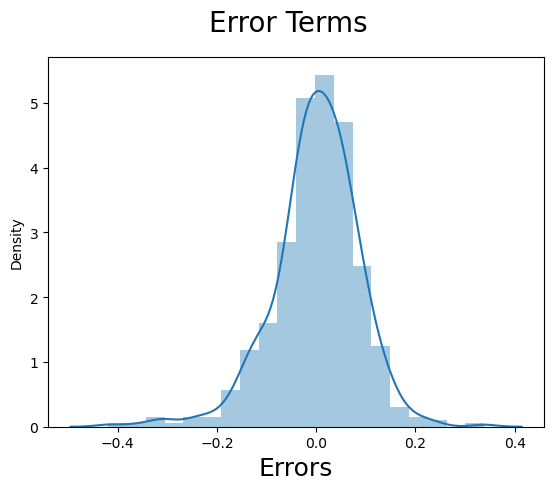

In [97]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_rfe - y_train_rfe_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

## Making Predictions

In [98]:
# Scaling the variables in test set 
num_vars = ['holiday','temp','atemp','hum','windspeed','cnt']

df_test_rfe[num_vars] = scaler.fit_transform(df_test_rfe[num_vars])
df_test_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light_Precipitation,Misty,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
184,0,1.0,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1,0.0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0.0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,1,...,0,0,1,0,0,0,0,1,0,0
221,0,0.0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0.0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,0,...,0,0,0,0,0,0,0,1,0,0


In [99]:
y_test_rfe = df_test_rfe.pop('cnt')
X_test_rfe = df_test_rfe

In [100]:
# add constant 
X_test_rfe_sm = sm.add_constant(X_test_rfe)
X_test_rfe_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,Light_Precipitation,Misty,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
184,1.0,0,1.0,0,0.837241,0.778767,0.534223,0.149393,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1.0,1,0.0,1,0.911423,0.855132,0.470417,0.231142,0,0,...,0,0,0,0,0,0,0,0,0,1
299,1.0,0,0.0,1,0.496221,0.492359,0.777843,0.443398,0,1,...,0,0,1,0,0,0,0,1,0,0
221,1.0,0,0.0,1,0.890387,0.805661,0.236659,0.449707,0,0,...,0,0,0,0,0,0,0,0,0,1
152,1.0,0,0.0,1,0.821739,0.749249,0.070765,0.682387,0,0,...,0,0,0,0,0,0,0,1,0,0


In [101]:
X_test_rfe_sm = X_test_rfe_sm[X_train_rfe_sm.columns]

In [102]:
# Predict
y_test_rfe_pred= lm.predict(X_test_rfe_sm)


Text(0, 0.5, 'y_pred')

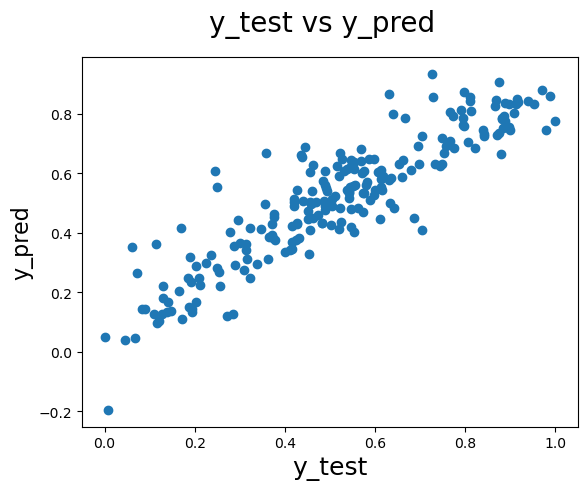

In [103]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test_rfe,y_test_rfe_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [104]:
# Evaluate the model 

r2_score(y_true=y_test_rfe, y_pred=y_test_rfe_pred)

0.8136358792412071

#### Using RFE and prediction using the model gives a R-squared value of 0.813 which was close to what we obtained using the manual elimination of the variables. With this we conclude that the final model gives the best fitting line.